# 64x16x64 Autoencoder

In [1]:
from nn import NeuralNetwork
import numpy as np
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

### Read in digits dataset

In [2]:
digits = load_digits().data
print(digits.shape)
#print first 5 entries of the dataset, just to see what it looks like
pd.DataFrame(digits).head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Split digits into training and validation sets

In [3]:
#create a held-out set for future accuracy calculation
held_out, train_val = train_test_split(digits, test_size=0.15, random_state=42)
#use a 70/30 train/test split of the remaining data
X_train, X_val = train_test_split(train_val, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_val.shape)

(189, 64)
(81, 64)


### Generate instance of Neural Network class

In [4]:
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
           {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]

ae = NeuralNetwork(nn_arch,
                   lr = 1e-7,#0.0000001,
                   seed=42,
                   batch_size = 10,
                   epochs=3000,
                   loss_function = "mean squared error")

### Train autoencoder on training data

In [5]:
#inputs and outputs should be the same for an autoencoder
per_epoch_loss_train, per_epoch_loss_val = ae.fit(X_train, X_train, X_val, X_val)

### Plot training and validation loss per epoch

Define plotting function and make plots:

45.71551932282639

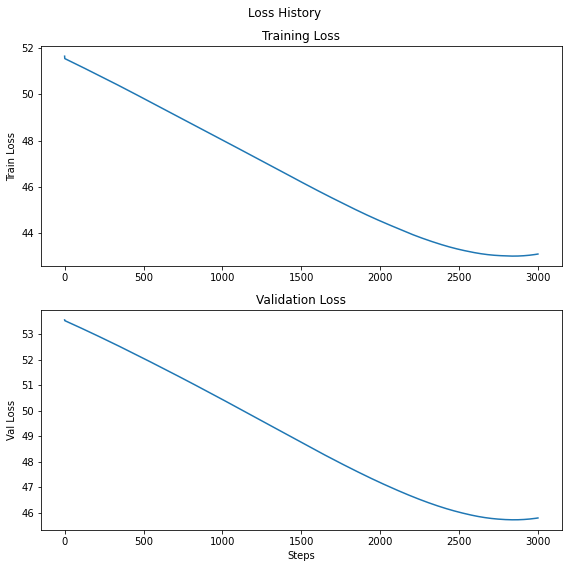

In [6]:
def plot_loss_history(per_epoch_loss_train, per_epoch_loss_val):
    """
    Plots the loss history after training is complete.
    """
    loss_hist = per_epoch_loss_train
    loss_hist_val = per_epoch_loss_val
    assert len(loss_hist) > 0, "Need to run training before plotting loss history"
    fig, axs = plt.subplots(2, figsize=(8,8))
    fig.suptitle('Loss History')
    axs[0].plot(np.arange(len(loss_hist)), loss_hist)
    axs[0].set_title('Training Loss')
    axs[1].plot(np.arange(len(loss_hist_val)), loss_hist_val)
    axs[1].set_title('Validation Loss')
    plt.xlabel('Steps')
    axs[0].set_ylabel('Train Loss')
    axs[1].set_ylabel('Val Loss')
    fig.tight_layout()
    
plot_loss_history(per_epoch_loss_train, per_epoch_loss_val)
min(per_epoch_loss_val)

### Hyperparameter Tuning
Now try out some more hyperparameters

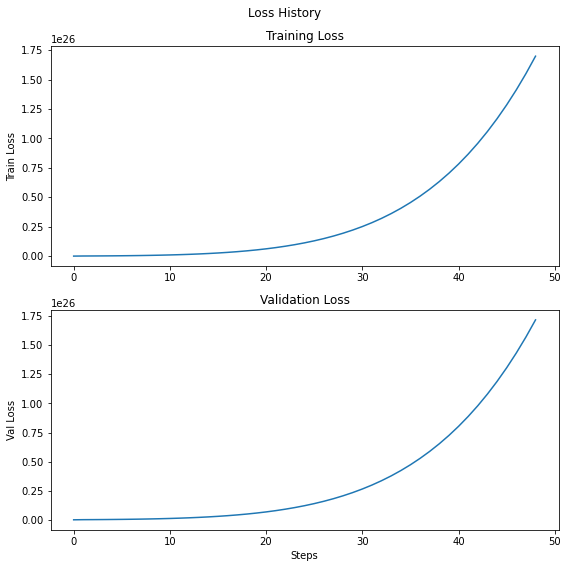

In [77]:
ae2 = NeuralNetwork(nn_arch,
                   lr = 0.1,
                   seed=42,
                   batch_size = 10,
                   epochs=50,
                   loss_function = "mean squared error")
per_epoch_loss_train2, per_epoch_loss_val2 = ae2.fit(X_train, X_train, X_val, X_val)
plot_loss_history(per_epoch_loss_train2, per_epoch_loss_val2)

Clearly a higher learning rate of 0.1 does not improve model performance, so we should stick with lower learning rates. Let's try a learning rate in between the one in our first and second ae instances, and adjust the number of epochs accordingly.

45.743188261119606

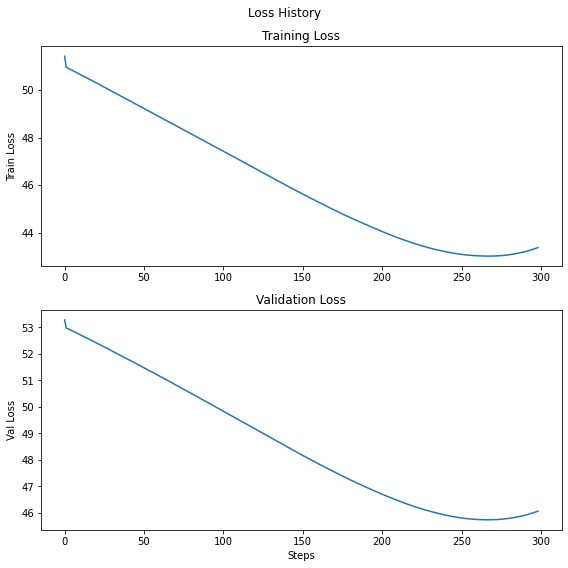

In [80]:
ae3 = NeuralNetwork(nn_arch,
                   lr = 1e-6,
                   seed=42,
                   batch_size = 10,
                   epochs=300,
                   loss_function = "mean squared error")
per_epoch_loss_train3, per_epoch_loss_val3 = ae3.fit(X_train, X_train, X_val, X_val)
plot_loss_history(per_epoch_loss_train3, per_epoch_loss_val3)
min(per_epoch_loss_val3)

The learning rate of 1e-6 gives about the same minimum validation loss as that given by a learning rate of 1e-7, but it does so in fewer epochs, so moving forward I'll use a learning rate of 1e-6. Now I'll do some manual tuning of the batch size.

45.57362096808921

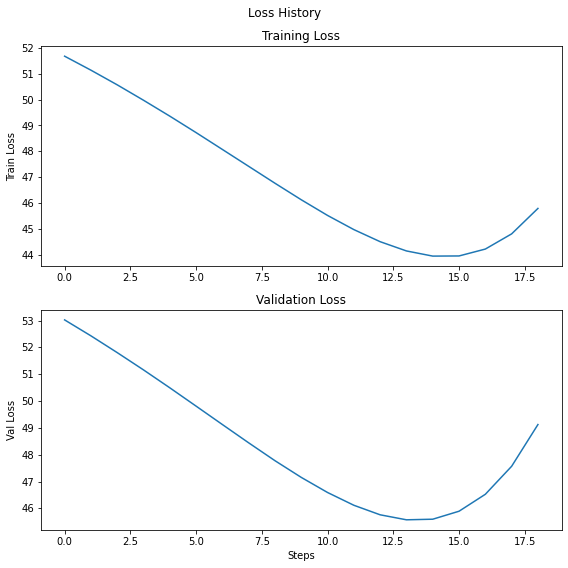

In [84]:
ae4 = NeuralNetwork(nn_arch,
                   lr = 1e-6,
                   seed=42,
                   batch_size = 1000,
                   epochs=20,
                   loss_function = "mean squared error")
per_epoch_loss_train4, per_epoch_loss_val4 = ae4.fit(X_train, X_train, X_val, X_val)
plot_loss_history(per_epoch_loss_train4, per_epoch_loss_val4)
min(per_epoch_loss_val4)

It looks like a larger batch size gives about the same loss as smaller batch sizes, in very few epochs. But what about really small batch sizes?

45.26096998974244

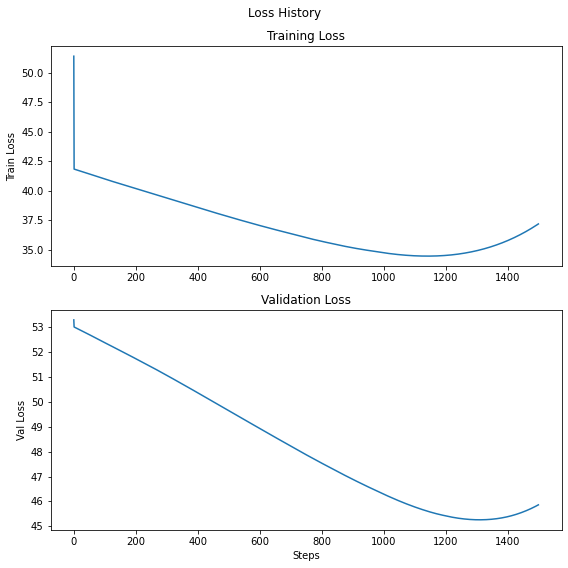

In [89]:
ae5 = NeuralNetwork(nn_arch,
                   lr = 1e-6,
                   seed=42,
                   batch_size = 3,
                   epochs=1500,
                   loss_function = "mean squared error")
per_epoch_loss_train5, per_epoch_loss_val5 = ae5.fit(X_train, X_train, X_val, X_val)
plot_loss_history(per_epoch_loss_train5, per_epoch_loss_val5)
min(per_epoch_loss_val5)

It seems like batch size is not making mutch of a difference in terms of training and validation loss, as long as the number of epochs is also adjusted along with it. Since 1500 is a fairly high value for epochs, I'll stick with the first batch_size I used, which is 10.

### Why were the final hyperparameters chosen?

Hyperparameters chosen: learning rate = 1e-6 , batch size = 10 , epochs = 300.
These hyperparameters were chosen because they give the lowest validation loss as well as a relatively low training loss.

### Quantify average reconstruction error

In [7]:
#Re-run the model with correct hyperparameters
final_ae = NeuralNetwork(nn_arch,
                   lr = 1e-6,
                   seed=42,
                   batch_size = 10,
                   epochs=175,
                   loss_function = "mean squared error")
per_epoch_loss_train, per_epoch_loss_val = final_ae.fit(X_train, X_train, X_val, X_val)

In [8]:
#get predictions on held out set based on current fitted model
pred = final_ae.predict(held_out)

#compute mean squared error on the held out set to get the average reconstruction error
avg_error = final_ae._mean_squared_error(held_out, pred)

print("The average reconstruction error was " + str(avg_error)+".")

The average reconstruction error was 46.80371545081955.
